# EDA

## Library import 

In [2]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings
import mlflow
import seaborn as sns

from modeling.config import EXPERIMENT_NAME
TRACKING_URI = open("../.mlflow_uri").read().strip()

warnings.filterwarnings('ignore')

## Dataimport

In [3]:
articles = pd.read_csv("../data/articles.csv").sort_values ("article_id").reset_index(drop=True)
custom = pd.read_csv("../data/customers.csv" ).sort_values("customer_id").reset_index(drop=True)
trans= pd.read_csv("../data/transactions_train.csv").sort_values("customer_id").reset_index(drop=True)
sample=pd.read_csv("../data/sample_submission.csv").sort_values("customer_id").reset_index(drop=True)

In [29]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [1]:
articles.query("article_id==0700696001"]

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (633089072.py, line 1)

In [4]:
custom.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-07-25,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,745232001,0.021169,1
1,2020-03-21,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,890498002,0.031763,2
2,2020-03-21,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,887593002,0.021593,2
3,2020-03-21,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,841260003,0.011508,2
4,2018-12-27,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,0.044051,1


In [25]:
trans["customer_id"].head()

0    00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
1    00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
2    00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
3    00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
4    00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
Name: customer_id, dtype: object

In [6]:
sample.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [7]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [46]:
(articles["product_type_no"]==-1).value_counts()

False    105421
True        121
Name: product_type_no, dtype: int64

In [48]:
articles["product_type_no"].nunique()

132

In [207]:
articles["perceived_colour_master_name"].nunique()

20

In [220]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

articles.head(100)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


In [52]:
articles[articles["product_type_no"]==-1]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
64,156224002,156224,Box 4p Socks,-1,Unknown,Unknown,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Semi-matte socks with a short shaft. 20 denier.
4015,473954008,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4016,473954013,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4017,473954014,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,17,Yellowish Brown,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4018,473954015,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,17,Yellowish Brown,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104622,925139001,925139,Ruben set,-1,Unknown,Unknown,1010016,Solid,9,Black,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Set with a matching iPhone case and protective...
104623,925139002,925139,Ruben set,-1,Unknown,Unknown,1010016,Solid,51,Light Pink,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Set with a matching iPhone case and protective...
104624,925139003,925139,Ruben set,-1,Unknown,Unknown,1010016,Solid,61,Light Purple,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Set with a matching iPhone case and protective...
104796,927131002,927131,Payton Hood(1),-1,Unknown,Unknown,1010010,Melange,8,Dark Grey,...,Men Sport Woven,S,Sport,26,Sport,22,Men H&M Sport,1005,Jersey Fancy,Track jacket in sturdy cotton-blend jersey wit...


In [56]:
articles["product_type_name"].unique()

array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip', 'Umbrella',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Unknown',
       'Hoodie', 'Sleep Bag', 'Hair/alice band', 'Belt', 'Boots',
       'Bikini top', 'Swimwear bottom', 'Underwear bottom', 'Swimsuit',
       'Skirt', 'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top',
       'Shorts', 'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers',
       'Sunglasses', 'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer',
       'Other shoe', 'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Costumes',
       'Robe', 'Scarf', 'Coat', 'Other accessories', 'Polo shirt',
       'Slippers', 'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Sleeping sack', 'Dungarees',

In [59]:
articles["product_group_name"].unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [67]:
articles[articles["graphical_appearance_no"]== -1].count()

article_id                      52
product_code                    52
prod_name                       52
product_type_no                 52
product_type_name               52
product_group_name              52
graphical_appearance_no         52
graphical_appearance_name       52
colour_group_code               52
colour_group_name               52
perceived_colour_value_id       52
perceived_colour_value_name     52
perceived_colour_master_id      52
perceived_colour_master_name    52
department_no                   52
department_name                 52
index_code                      52
index_name                      52
index_group_no                  52
index_group_name                52
section_no                      52
section_name                    52
garment_group_no                52
garment_group_name              52
detail_desc                     52
dtype: int64

In [69]:
articles["colour_group_code"].nunique()

50

In [71]:
articles["colour_group_name"].unique()

array(['Black', 'White', 'Off White', 'Light Beige', 'Beige', 'Grey',
       'Light Blue', 'Light Grey', 'Dark Blue', 'Dark Grey', 'Pink',
       'Dark Red', 'Greyish Beige', 'Light Orange', 'Silver', 'Gold',
       'Light Pink', 'Dark Pink', 'Yellowish Brown', 'Blue',
       'Light Turquoise', 'Yellow', 'Greenish Khaki', 'Dark Yellow',
       'Other Pink', 'Dark Purple', 'Red', 'Transparent', 'Dark Green',
       'Other Red', 'Turquoise', 'Dark Orange', 'Other', 'Orange',
       'Dark Beige', 'Other Yellow', 'Light Green', 'Other Orange',
       'Purple', 'Light Red', 'Light Yellow', 'Green', 'Light Purple',
       'Dark Turquoise', 'Other Purple', 'Bronze/Copper',
       'Other Turquoise', 'Other Green', 'Other Blue', 'Unknown'],
      dtype=object)

In [79]:
(articles["perceived_colour_value_id"]==-1).count()

105542

In [74]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [90]:
articles["perceived_colour_value_id"][articles["perceived_colour_value_name"]=="Medium"]

60        7
94        7
130       7
131       7
191       7
         ..
105314    7
105339    7
105454    7
105461    7
105497    7
Name: perceived_colour_value_id, Length: 5711, dtype: int64

In [94]:
articles["perceived_colour_master_name"].unique()

array(['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
       'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
       'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
       'Bluish Green'], dtype=object)

In [98]:
articles["department_no"].unique()

array([1676, 1339, 3608, 6515, 1334, 5883, 2032, 4342, 4343, 3419, 6563,
       8559, 8394, 7956, 3611, 3610, 3937, 7930, 5283, 3509, 3929, 4242,
       7988, 1643, 5963, 8560, 7668, 7932, 5783, 3709, 5683, 3946, 8888,
       3519, 5656, 3945, 5868, 9985, 4344, 5962, 1649, 3209, 8615, 1626,
       2031, 5658, 5961, 1338, 1722, 7922, 8768, 7921, 7931, 3630, 2035,
       5882, 3629, 3710, 8558, 3948, 3944, 8756, 1919, 1939, 5960, 3705,
       7188, 1745, 1773, 1779, 5878, 7389, 5828, 1747, 1772, 1244, 8956,
       3439, 3409, 9986, 1344, 1444, 7920, 6541, 1948, 8757, 4312, 8917,
       3527, 2950, 1717, 1343, 5673, 5957, 8090, 5687, 5831, 7388, 1666,
       5631, 1920, 8616, 8617, 5731, 1949, 2033, 5672, 8718, 1201, 5884,
       5958, 1545, 1644, 5679, 6512, 5686, 3040, 5956, 1547, 6564, 1422,
       1670, 4345, 5832, 5454, 4225, 1641, 1647, 4214, 4224, 5952, 9984,
       4310, 4320, 8316, 8310, 1636, 5777, 5555, 2034, 6565, 4210, 4220,
       1414, 1723, 4314, 5848, 4317, 1543, 1510, 16

In [101]:
articles["index_code"].nunique()

10

In [103]:
articles["index_name"].unique()

array(['Ladieswear', 'Lingeries/Tights', 'Baby Sizes 50-98', 'Menswear',
       'Ladies Accessories', 'Sport', 'Children Sizes 92-140', 'Divided',
       'Children Sizes 134-170', 'Children Accessories, Swimwear'],
      dtype=object)

In [105]:
articles["index_group_no"].unique()

array([ 1,  4,  3, 26,  2])

In [120]:
articles["index_group_name"][articles["index_group_no"]==4]

11        Baby/Children
12        Baby/Children
37        Baby/Children
38        Baby/Children
46        Baby/Children
              ...      
105522    Baby/Children
105523    Baby/Children
105524    Baby/Children
105526    Baby/Children
105533    Baby/Children
Name: index_group_name, Length: 34711, dtype: object

In [126]:
articles["section_no"].unique()

array([16, 61, 62, 44, 26,  8, 66, 22, 46, 51, 79, 31, 65, 52, 60, 58, 72,
       55, 21, 25, 23, 15, 27, 47,  2, 53, 57, 20, 18, 45, 77, 64, 11, 50,
       56, 29, 19, 30, 41,  6, 43,  5, 42, 40, 76, 80, 14, 82, 49, 24, 28,
       97, 70, 71, 48,  4, 17])

In [128]:
articles["section_name"].unique()

array(['Womens Everyday Basics', 'Womens Lingerie',
       'Womens Nightwear, Socks & Tigh', 'Baby Essentials & Complements',
       'Men Underwear', 'Mama', 'Womens Small accessories',
       'Men H&M Sport', 'Kids Boy', 'Divided Basics',
       'Girls Underwear & Basics', 'Mens Outerwear',
       'Womens Big accessories', 'Divided Accessories',
       'Womens Swimwear, beachwear', 'Divided Selected',
       'Boys Underwear & Basics', 'Contemporary Street',
       'Contemporary Casual', 'Men Accessories', 'Men Suits & Tailoring',
       'Womens Everyday Collection', 'Men Shoes', 'Young Boy', 'H&M+',
       'Divided Collection', 'Ladies Denim', 'Contemporary Smart',
       'Womens Trend', 'Kids Outerwear', 'Young Girl', 'Womens Shoes',
       'Womens Tailoring', 'Divided Projects', 'Denim Men', 'Men Other',
       'Womens Jackets', 'Men Other 2', 'Baby Boy', 'Womens Casual',
       'Kids Accessories, Swimwear & D', 'Ladies H&M Sport',
       'Kids & Baby Shoes', 'Baby Girl', 'Kids Girl

In [133]:
sorted(articles["garment_group_no"].unique())

[1001,
 1002,
 1003,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1023,
 1025]

In [135]:
articles["garment_group_name"].unique()

array(['Jersey Basic', 'Under-, Nightwear', 'Socks and Tights',
       'Jersey Fancy', 'Accessories', 'Trousers Denim', 'Outdoor',
       'Shoes', 'Swimwear', 'Knitwear', 'Shirts', 'Trousers', 'Dressed',
       'Shorts', 'Dresses Ladies', 'Skirts', 'Special Offers', 'Blouses',
       'Unknown', 'Woven/Jersey/Knitted mix Baby', 'Dresses/Skirts girls'],
      dtype=object)

In [139]:
articles["detail_desc"].isnull().sum()

416

In [140]:
custom.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [142]:
#import io
#buffer = io.StringIO()
#custom.info(buf=buffer)
#s = buffer.getvalue()
#with open("../metadata/custom_info.txt", "w", encoding="utf-8") as f:
#    f.write(s)

In [147]:
custom.customer_id.unique()

array(['00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657',
       '0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa',
       '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318',
       ...,
       'ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264',
       'ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a',
       'ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241'],
      dtype=object)

In [149]:
custom.FN.unique()

array([nan,  1.])

In [152]:
custom.Active.unique()

array([nan,  1.])

In [154]:
custom.club_member_status.unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [159]:
custom["fashion_news_frequency"].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [163]:
custom["fashion_news_frequency"].isnull().sum()

16009

In [168]:
custom["age"].isnull().sum()

15861

In [170]:
custom["postal_code"].unique()

array(['52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100',
       '2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93f4c830291c32bc3057',
       '64f17e6a330a85798e4998f62d0930d14db8db1c054af6c9090f7dd3e38380dc',
       ...,
       'c9d6890a6a194925f2c7712bde35b4ea973971cbe27c993ee907fe6d97a3ab0c',
       'c9e32043e0338a51dfd94705cfd8f75eb98c2ec34730497c9726b21e59ee4572',
       '0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d'],
      dtype=object)

In [171]:
trans.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [172]:
trans.shape

(31788324, 5)

In [178]:
trans.customer_id.nunique()

1362281

In [180]:
articles.article_id.nunique()

105542

In [179]:
trans.article_id.nunique()

104547

In [183]:
trans.price.unique()

array([0.02116949, 0.03176271, 0.02159322, ..., 0.10649153, 0.16301695,
       0.11947458])

In [184]:
trans.sales_channel_id.nunique()

2

In [187]:
sample.shape

(1371980, 2)

In [188]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1371980 non-null  object
 1   prediction   1371980 non-null  object
dtypes: object(2)
memory usage: 20.9+ MB


In [190]:
sample.customer_id.unique()

array(['00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657',
       '0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa',
       '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318',
       ...,
       'ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264',
       'ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a',
       'ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241'],
      dtype=object)

In [192]:
sample.prediction

0          0706016001 0706016002 0372860001 0610776002 07...
1          0706016001 0706016002 0372860001 0610776002 07...
2          0706016001 0706016002 0372860001 0610776002 07...
3          0706016001 0706016002 0372860001 0610776002 07...
4          0706016001 0706016002 0372860001 0610776002 07...
                                 ...                        
1371975    0706016001 0706016002 0372860001 0610776002 07...
1371976    0706016001 0706016002 0372860001 0610776002 07...
1371977    0706016001 0706016002 0372860001 0610776002 07...
1371978    0706016001 0706016002 0372860001 0610776002 07...
1371979    0706016001 0706016002 0372860001 0610776002 07...
Name: prediction, Length: 1371980, dtype: object

Wuhu Worked

In [8]:
articles.tail()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.
105541,959461001,959461,Lounge dress,265,Dress,Garment Full body,1010016,Solid,11,Off White,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,Calf-length dress in ribbed jersey made from a...


... till the end

# First EDA

In [9]:
articles.shape

(105542, 25)

In [33]:
articles.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

Total 105542 Rows and 25 columns. 15 objects and 10 integer. 416 Missing values at detail_desc

In [34]:
#import io
#buffer = io.StringIO()
#articles.info(buf=buffer)
#s = buffer.getvalue()
#with open("articls_info.txt", "w", encoding="utf-8") as f:
#    f.write(s)

### Deeper look at the integers

In [11]:
articles.describe().T

,count,mean,std,min,25%,50%,75%,max
article_id,105542.0,6.984246e+08,1.284624e+08,108775015.0,616992501.0,702213001.5,7.967030e+08,959461001.0
product_code,105542.0,6.984246e+05,1.284624e+05,108775.0,616992.5,702213.0,7.967030e+05,959461.0
product_type_no,105542.0,2.348619e+02,7.504931e+01,-1.0,252.0,259.0,2.720000e+02,762.0
graphical_appearance_no,105542.0,1.009515e+06,2.241359e+04,-1.0,1010008.0,1010016.0,1.010016e+06,1010029.0
colour_group_code,105542.0,3.223382e+01,2.808615e+01,-1.0,9.0,14.0,5.200000e+01,93.0
perceived_colour_value_id,105542.0,3.206183e+00,1.563839e+00,-1.0,2.0,4.0,4.000000e+00,7.0
perceived_colour_master_id,105542.0,7.807972e+00,5.376727e+00,-1.0,4.0,5.0,1.100000e+01,20.0
department_no,105542.0,4.532778e+03,2.712692e+03,1201.0,1676.0,4222.0,7.389000e+03,9989.0
index_group_no,105542.0,3.171534e+00,4.353234e+00,1.0,1.0,2.0,4.000000e+00,26.0
section_no,105542.0,4.266422e+01,2.326010e+01,2.0,20.0,46.0,6.100000e+01,97.0


In [ ]:
#sns.pairplot(articles)

No missing values at the integer values. 

In [ ]:
#sns.histplot(articles)

In [ ]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [ ]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
articles.product_type_name.unique()

array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip', 'Umbrella',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Unknown',
       'Hoodie', 'Sleep Bag', 'Hair/alice band', 'Belt', 'Boots',
       'Bikini top', 'Swimwear bottom', 'Underwear bottom', 'Swimsuit',
       'Skirt', 'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top',
       'Shorts', 'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers',
       'Sunglasses', 'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer',
       'Other shoe', 'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Costumes',
       'Robe', 'Scarf', 'Coat', 'Other accessories', 'Polo shirt',
       'Slippers', 'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Sleeping sack', 'Dungarees',

In [19]:
articles.product_type_name.nunique()

131

In [ ]:
#sns.pairplot(articles)

In [ ]:
# Customer

In [ ]:
custom.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [18]:
custom["postal_code"].nunique()

352899

In [ ]:
custom.tail()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...
1371979,ffffd9ac14e89946416d80e791d064701994755c3ab686...,NaN,NaN,PRE-CREATE,NONE,65.0,0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...


What is FN ?

In [ ]:
custom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


Some age are missing impute ? 
A lot of FN is missing
A lot of active is missing


In [ ]:
custom.describe().T

,count,mean,std,min,25%,50%,75%,max
FN,476930.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Active,464404.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
age,1356119.0,36.386965,14.313628,16.0,24.0,32.0,49.0,99.0


FN & Active are boolean 


<AxesSubplot:xlabel='age', ylabel='Count'>

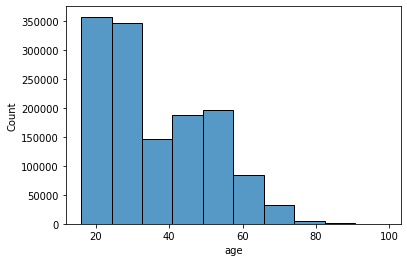

In [ ]:
sns.histplot(custom["age"],bins=10)

In [ ]:
fig = plt.figure(figsize=(20,10))
fig = sns.histplot(data=custom, x="age",  hue="club_member_status")

NameError: name 'plt' is not defined

In [ ]:
custom.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

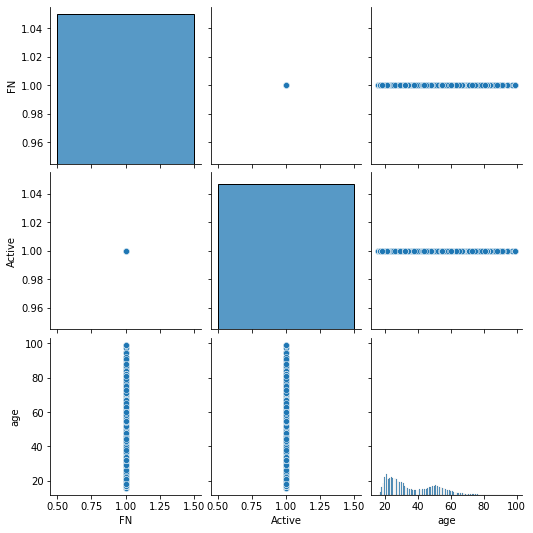

In [ ]:
sns.pairplot(custom)

In [ ]:
### TRANSACTION

In [15]:
trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-07-25,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,745232001,0.021169,1
1,2020-03-21,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,890498002,0.031763,2
2,2020-03-21,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,887593002,0.021593,2
3,2020-03-21,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,841260003,0.011508,2
4,2018-12-27,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,0.044051,1


In [ ]:
trans.tail()

In [24]:
trans.shape

(31788324, 5)

In [ ]:
trans.info(verbose=True)

In [ ]:
trans.describe.T